In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
#ImageDataGenerator flollowed by normalization
train_datagen=ImageDataGenerator(rescale=1/255.0)
test_datagen=ImageDataGenerator(rescale=1/255.0)

In [3]:
train_data=train_datagen.flow_from_directory('training_set',target_size=(150,150),batch_size=32,class_mode='binary')
test_data=test_datagen.flow_from_directory('test_set',target_size=(150,150),batch_size=16,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('acc')>0.99:
            print('stops training')
            self.model.stop_training=True

In [5]:
callbacks=myCallbacks()

In [6]:
#model

In [7]:

model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),MaxPooling2D(2,2),
                 Conv2D(64,(3,3),activation='relu'),MaxPooling2D(2,2),
                 Conv2D(64,(3,3),activation='relu'),MaxPooling2D(2,2),
                 Flatten(),Dense(256,activation='relu'),Dense(1,activation='sigmoid')
                 ])

In [8]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [9]:
model.fit_generator(train_data,steps_per_epoch=128,epochs=15,validation_data=test_data,validation_steps=50,verbose=2,callbacks=[callbacks])

Epoch 1/15
 - 147s - loss: 0.8258 - acc: 0.5421 - val_loss: 0.7218 - val_acc: 0.5987
Epoch 2/15
 - 152s - loss: 0.6494 - acc: 0.6340 - val_loss: 0.6938 - val_acc: 0.6350
Epoch 3/15
 - 141s - loss: 0.5907 - acc: 0.6867 - val_loss: 0.4903 - val_acc: 0.7130
Epoch 4/15
 - 142s - loss: 0.5464 - acc: 0.7202 - val_loss: 0.8102 - val_acc: 0.6662
Epoch 5/15
 - 138s - loss: 0.4965 - acc: 0.7626 - val_loss: 0.5730 - val_acc: 0.7487
Epoch 6/15
 - 138s - loss: 0.4783 - acc: 0.7747 - val_loss: 0.5405 - val_acc: 0.7547
Epoch 7/15
 - 141s - loss: 0.4324 - acc: 0.8091 - val_loss: 0.7179 - val_acc: 0.7812
Epoch 8/15
 - 151s - loss: 0.4082 - acc: 0.8189 - val_loss: 0.6152 - val_acc: 0.7724
Epoch 9/15
 - 153s - loss: 0.3606 - acc: 0.8403 - val_loss: 0.6492 - val_acc: 0.7287
Epoch 10/15
 - 163s - loss: 0.3335 - acc: 0.8496 - val_loss: 0.7624 - val_acc: 0.7775
Epoch 11/15
 - 153s - loss: 0.2919 - acc: 0.8762 - val_loss: 0.4446 - val_acc: 0.7838
Epoch 12/15
 - 141s - loss: 0.2643 - acc: 0.8870 - val_loss: 0.

In [10]:
history=model.fit_generator(train_data,steps_per_epoch=128,epochs=15,validation_data=test_data,validation_steps=50,verbose=2,callbacks=[callbacks])

Epoch 1/15
 - 193s - loss: 0.1310 - acc: 0.9538 - val_loss: 0.8695 - val_acc: 0.7663
Epoch 2/15
 - 163s - loss: 0.1185 - acc: 0.9551 - val_loss: 0.5779 - val_acc: 0.8012
Epoch 3/15
 - 144s - loss: 0.0760 - acc: 0.9731 - val_loss: 0.9038 - val_acc: 0.7838
Epoch 4/15
 - 168s - loss: 0.0781 - acc: 0.9725 - val_loss: 1.6566 - val_acc: 0.7887
Epoch 5/15
 - 175s - loss: 0.0729 - acc: 0.9753 - val_loss: 1.2151 - val_acc: 0.7688
Epoch 6/15
 - 157s - loss: 0.0520 - acc: 0.9803 - val_loss: 1.3136 - val_acc: 0.7876
Epoch 7/15
 - 159s - loss: 0.0560 - acc: 0.9826 - val_loss: 0.8563 - val_acc: 0.7862
Epoch 8/15
 - 202s - loss: 0.0552 - acc: 0.9822 - val_loss: 0.1873 - val_acc: 0.8091
Epoch 9/15
 - 162s - loss: 0.0783 - acc: 0.9833 - val_loss: 1.1241 - val_acc: 0.7725
Epoch 10/15
 - 162s - loss: 0.0495 - acc: 0.9844 - val_loss: 3.0527 - val_acc: 0.7850
Epoch 11/15
 - 162s - loss: 0.0541 - acc: 0.9839 - val_loss: 2.3963 - val_acc: 0.7547
Epoch 12/15
 - 179s - loss: 0.0440 - acc: 0.9882 - val_loss: 2.

In [11]:
import matplotlib.pyplot as plt

In [12]:
# x-axis
epochs=range(len('acc'))

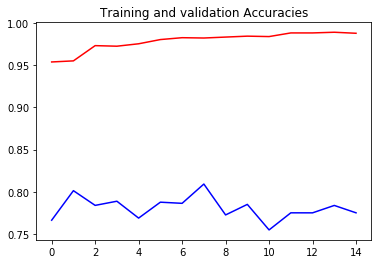

In [17]:
#Accuracy
plt.figure()
train_accuracy=history.history['acc']
test_accuracy=history.history['val_acc']
plt.plot(epochs,train_accuracy,'r',label='Training_accuracy')
plt.plot(epochs,test_accuracy,'b',label='Testing_accuracy')
plt.title('Training and validation Accuracies')
plt.show()

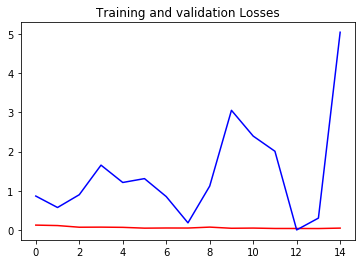

In [18]:
#Loss
plt.figure()
train_loss=history.history['loss']
test_loss=history.history['val_loss']
plt.plot(epochs,train_loss,'r',label='Training_Loss')
plt.plot(epochs,test_loss,'b',label='Testing_Loss')
plt.title('Training and validation Losses')
plt.show()